IN this notebook, we will be using the text data i.e "title","name" and "product_type" to recommend similar products

We use 3 model:

*   Bag of word

*   TFIDF
*   BERT





In [15]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os  
from sklearn.metrics import pairwise_distances
warnings.filterwarnings("ignore")
import nltk                                         #Natural language processing tool-kit
import re
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
os.chdir("/content/drive/MyDrive/nlp_projects/product_recomendation")

In [3]:
df=pd.read_csv("final_male_data.csv")
df.head()

name  ... unique_id
0  FLYING MACHINE  ...         1
1           ARROW  ...         3
2   PETER ENGLAND  ...         4
3   PETER ENGLAND  ...         7
4      HIGHLANDER  ...         8

[5 rows x 6 columns]

In [4]:
df.shape

(4618, 6)

In [5]:
# 401 brand available
df.name.value_counts()

PETER ENGLAND    340
HIGHLANDER       227
METRONAUT        215
Raymond          198
PARK AVENUE      190
                ... 
Katso              1
Brinley            1
OLDJERSEY          1
DUO COUPLE         1
ZEAL               1
Name: name, Length: 401, dtype: int64

In [6]:
sum(df.duplicated("title"))

3636

we can't just compare the similarity base on "title" because 3636 "title" is duplicated

In [11]:
sum(df.duplicated(["title","name"]))

2166

In [12]:
df["title_name_type"]=df["title"]+" "+df["name"]+" "+df["product_type"]
df.head()

name  ...                                    title_name_type
0  FLYING MACHINE  ...  Tapered Fit Men Black Jeans FLYING MACHINE bot...
1           ARROW  ...  Men Regular Fit Self Design Formal Shirt ARROW...
2   PETER ENGLAND  ...  Slim Fit Men Grey Polyester Viscose Blend Trou...
3   PETER ENGLAND  ...  Men Regular Fit Self Design Formal Shirt PETER...
4      HIGHLANDER  ...  Tapered Fit Men Blue Jeans HIGHLANDER bottomwe...

[5 rows x 7 columns]

Preprocessing

Tokenize

In [16]:
text=df["title_name_type"]

In [17]:
data_list = list()
for comp in text:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

Lowe_case

In [18]:
low=[]
for line in data_list:
  lines = list(map(lambda x : x.lower(),line))
  low.append(lines) 
print(low[:3])

[['tapered', 'fit', 'men', 'black', 'jeans', 'flying', 'machine', 'bottomwear_jeans'], ['men', 'regular', 'fit', 'self', 'design', 'formal', 'shirt', 'arrow', 'topwear_formal'], ['slim', 'fit', 'men', 'grey', 'polyester', 'viscose', 'blend', 'trousers', 'peter', 'england', 'bottomwear_formal']]


Remove Punctuation

In [19]:
#stop_words = set(stopwords.words('english')) 
puncList = [";",":","!","?","/","\\",",","#","@","$","&",")","(","\""]

#word_tokens = word_tokenize(text_tokens) 

Punc_filtered_sentence = [] 

for lines in low:
  punc = []
  for w in lines: 
      if w not in puncList: 
          punc.append(w) 
  Punc_filtered_sentence.append(punc)

print(len(low[0])) 
print(len(Punc_filtered_sentence[0]))

8
8


Removes stopswords

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop_words = set(stopwords.words('english')) 
    
filtered_sentence = [] 

for lines in Punc_filtered_sentence:
  word = []
  for w in lines: 
      if w not in stop_words: 
          word.append(w) 
  filtered_sentence.append(word)

print(len(Punc_filtered_sentence[0])) 
print(len(filtered_sentence[0])) 

8
8


In [22]:
txt=[]
for i in range(len(filtered_sentence)):
  txt.append(" ".join(filtered_sentence[i]))

In [23]:
df["filtered_text"]=txt
df.head()

name  ...                                      filtered_text
0  FLYING MACHINE  ...  tapered fit men black jeans flying machine bot...
1           ARROW  ...  men regular fit self design formal shirt arrow...
2   PETER ENGLAND  ...  slim fit men grey polyester viscose blend trou...
3   PETER ENGLAND  ...  men regular fit self design formal shirt peter...
4      HIGHLANDER  ...  tapered fit men blue jeans highlander bottomwe...

[5 rows x 8 columns]

BOW

In [24]:
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(df['filtered_text'])
title_features.get_shape() 

(4618, 646)

In [25]:
title_features

<4618x646 sparse matrix of type '<class 'numpy.int64'>'
	with 43098 stored elements in Compressed Sparse Row format>

In [36]:

from IPython.display import display, Image, SVG, Math, YouTubeVideo
from google.colab.patches import cv2_imshow

In [33]:
import urllib
import cv2
import urllib.request as ur
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = ur.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [74]:
def similar_product(item_name,model,features,brand_name=""):
  txt=item_name+" "+brand_name
  vector_form=model.transform([txt])
  pairwise_dist = pairwise_distances(features,vector_form)
  indices = np.argsort(pairwise_dist.flatten())[0:5]
  selected_data=df[['img_url','title']].iloc[indices]
  img_url=selected_data["img_url"].values
  for url in img_url:

    image = url_to_image(url)
    cv2_imshow(image)


    cv2.waitKey(0)

  

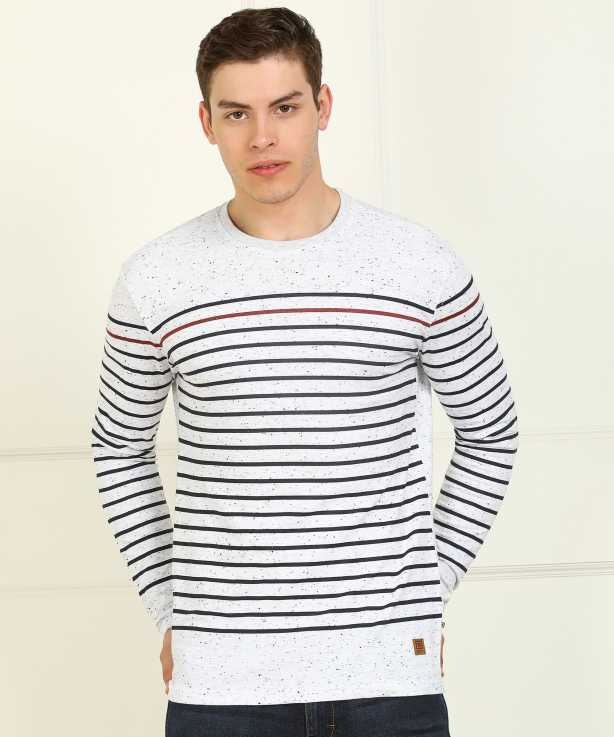

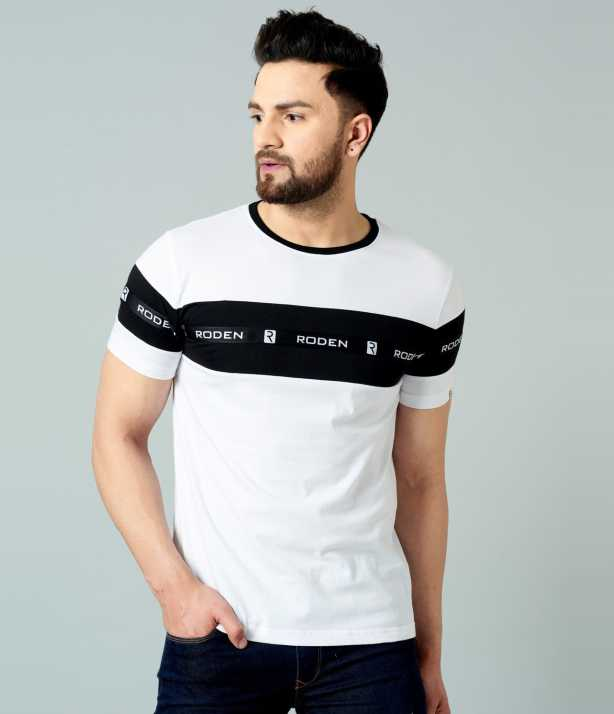

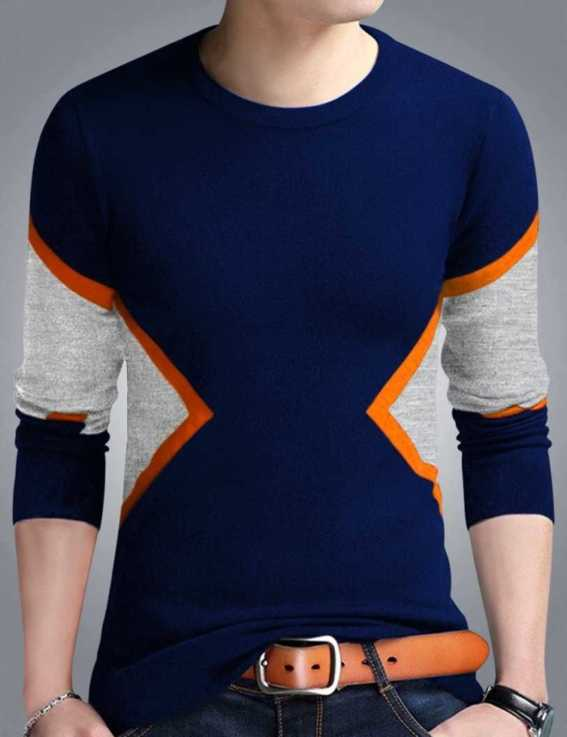

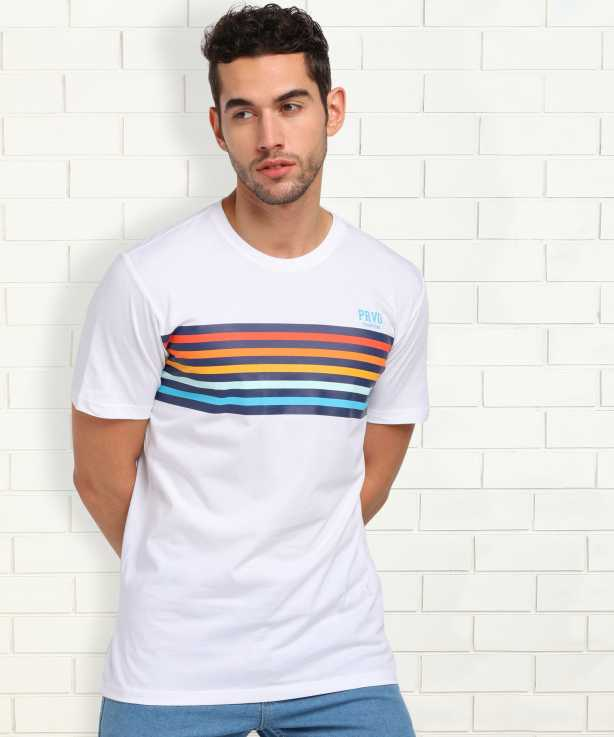

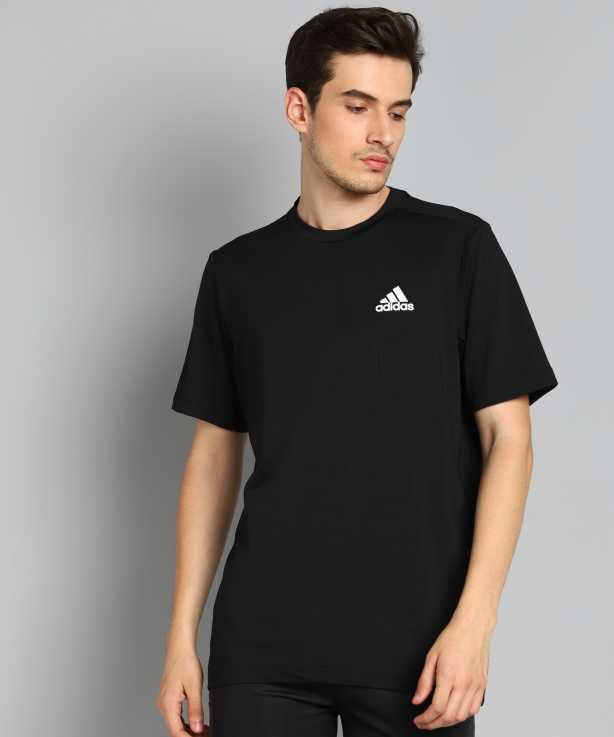

In [72]:
similar_product("striped men round next t-shirt",title_vectorizer,title_features)

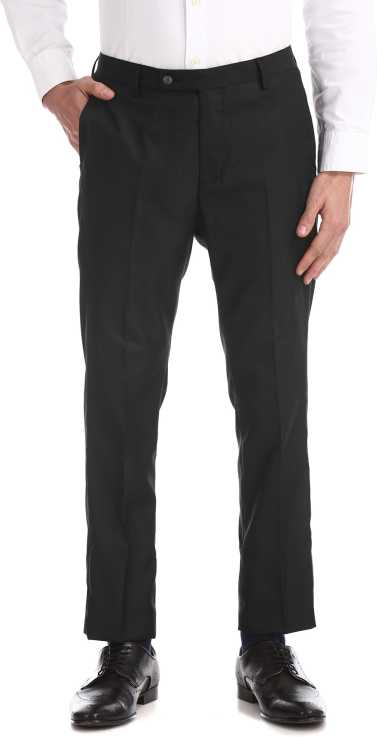

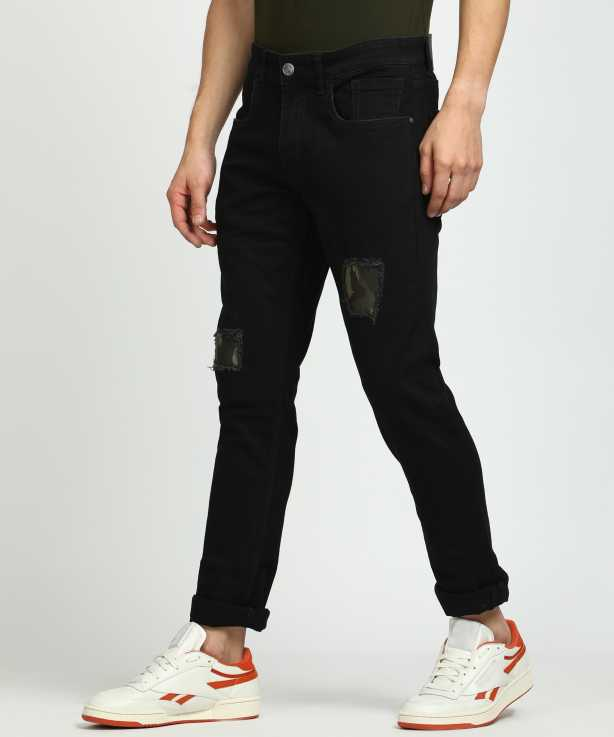

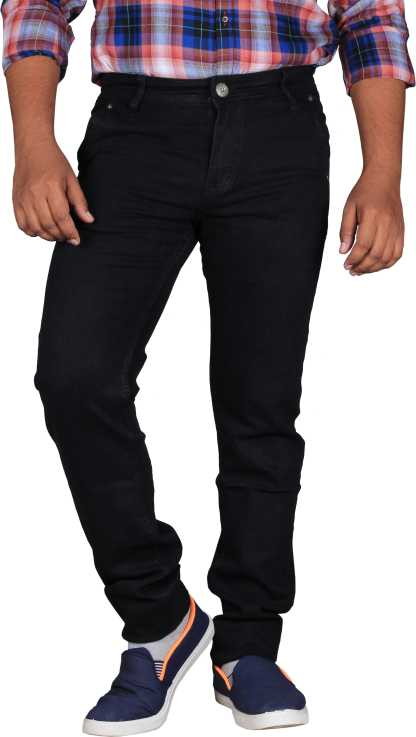

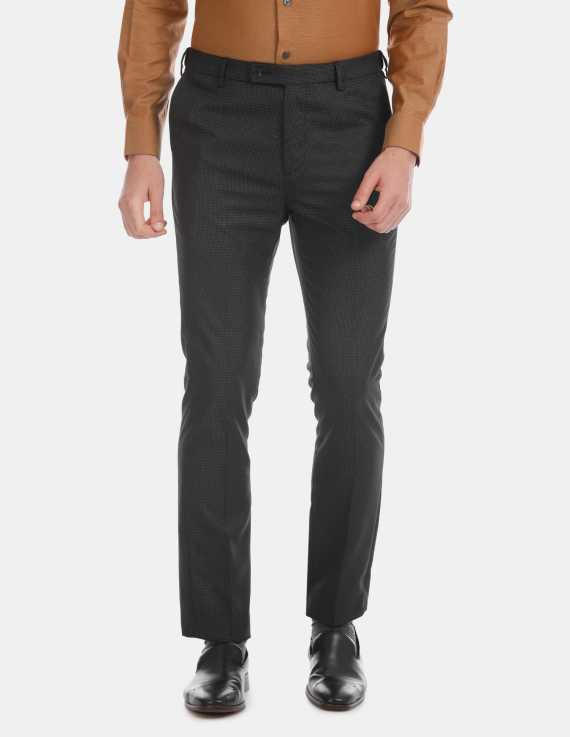

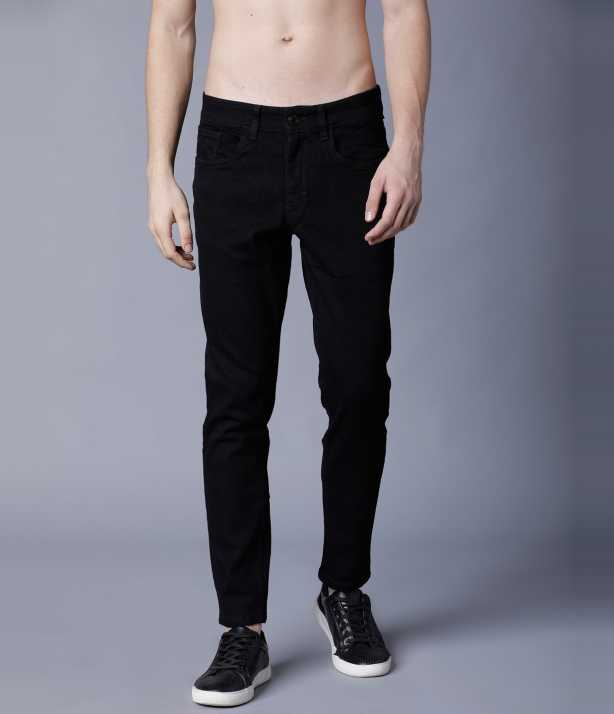

In [73]:
similar_product("regular fit men black trouser",title_vectorizer,title_features)

tfidf

In [51]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(df['filtered_text'])

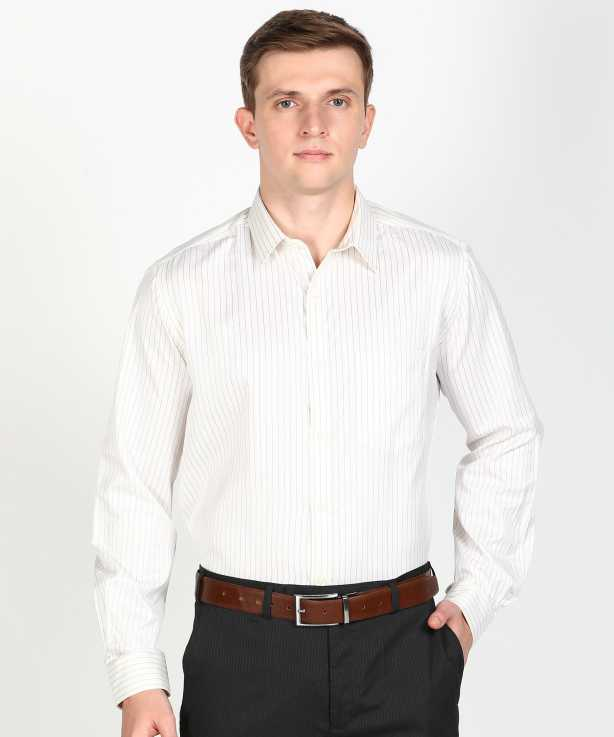

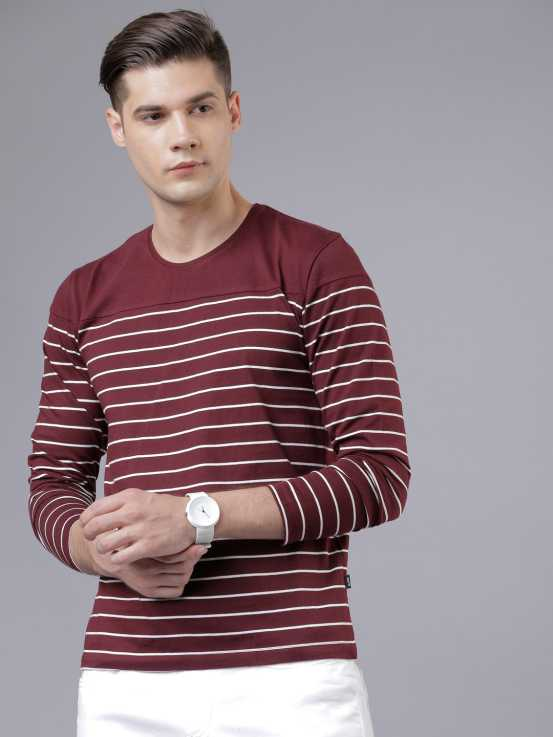

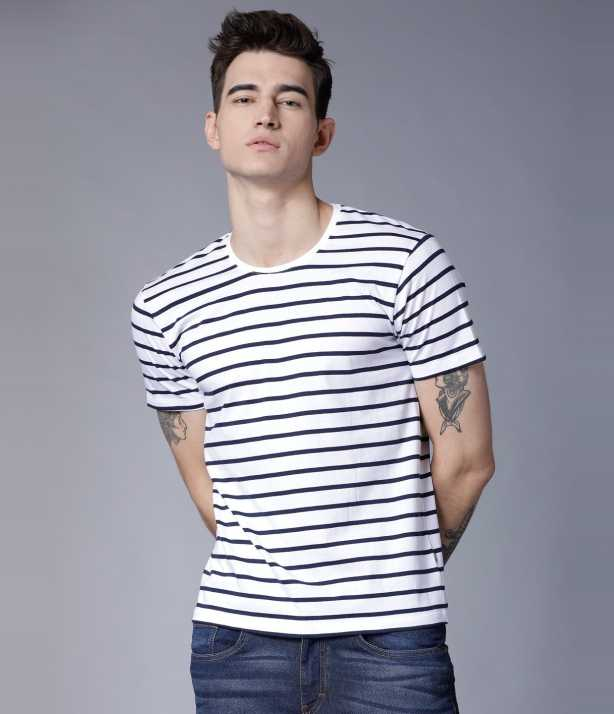

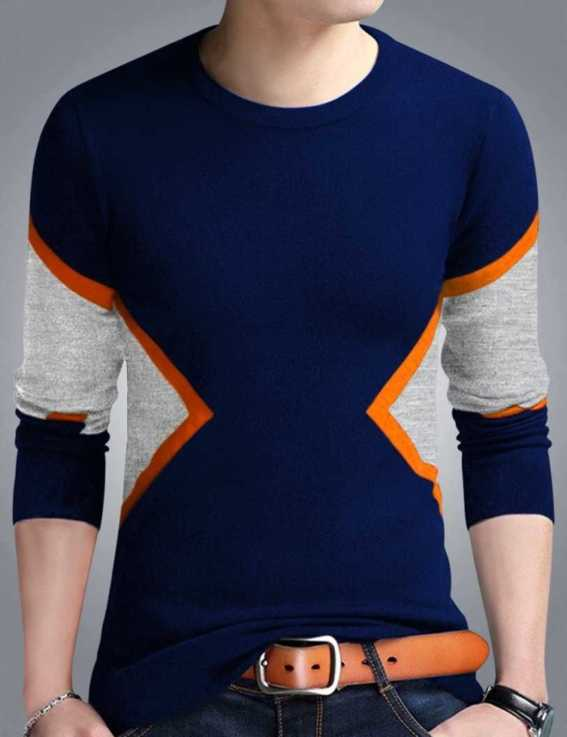

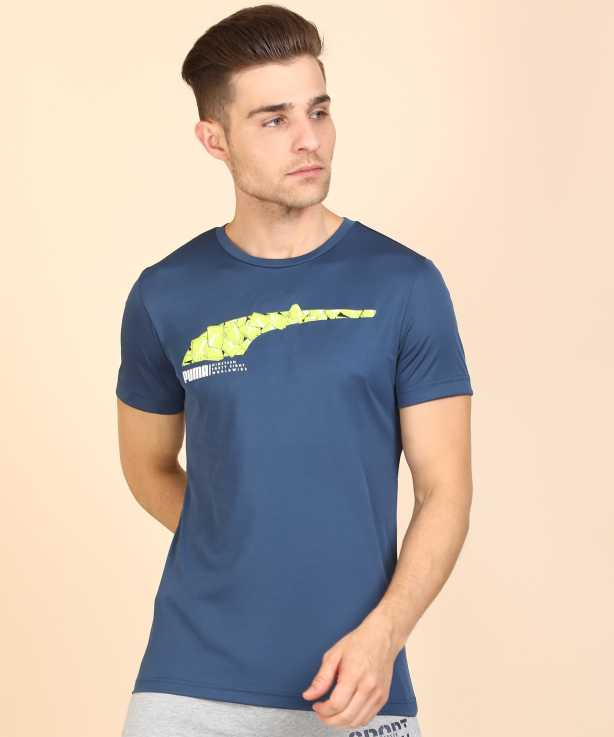

In [75]:
similar_product("striped men round next t-shirt",tfidf_title_vectorizer,tfidf_title_features)

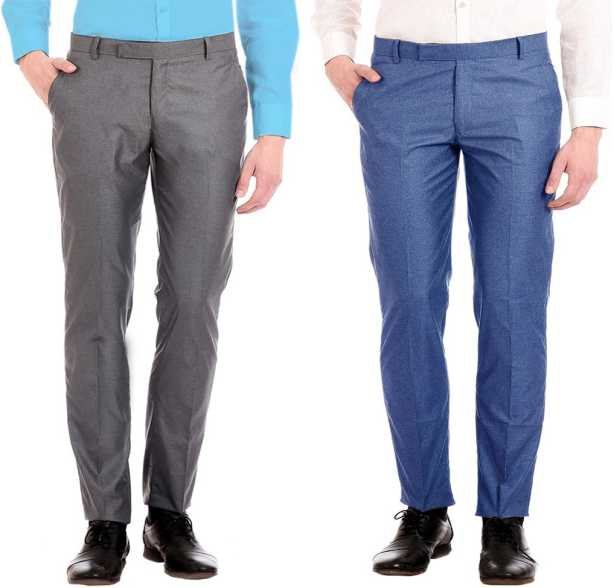

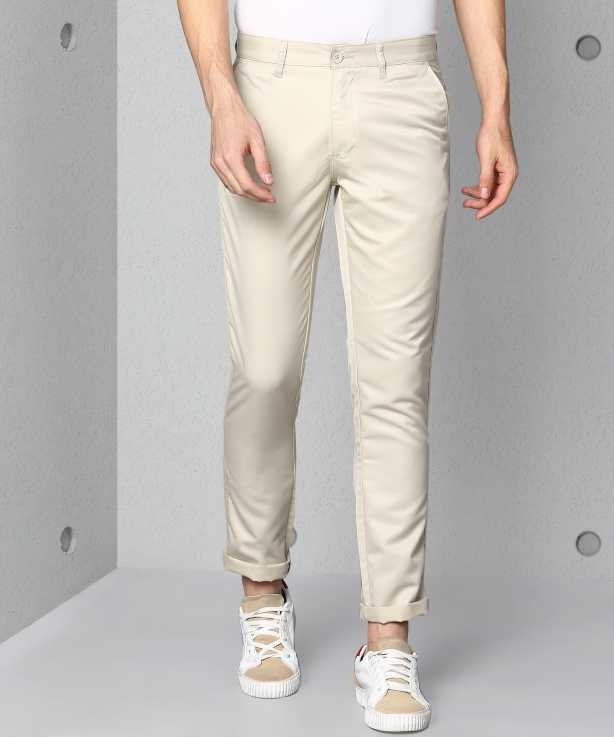

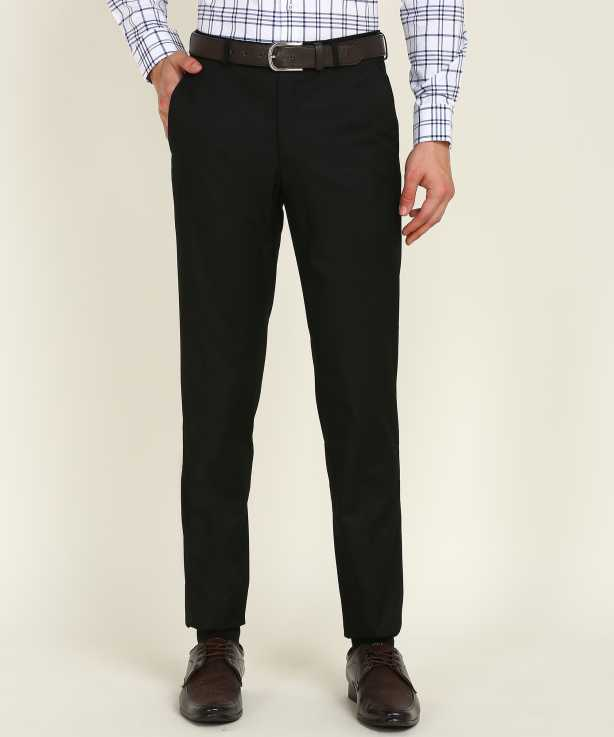

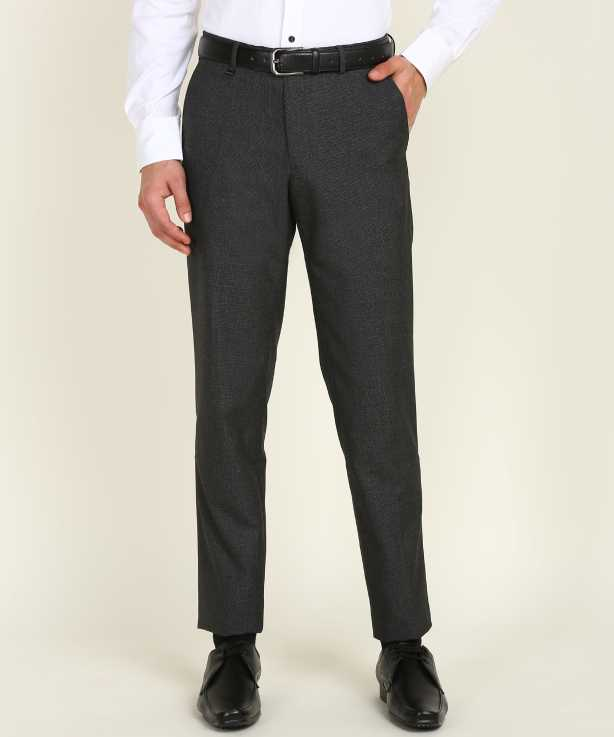

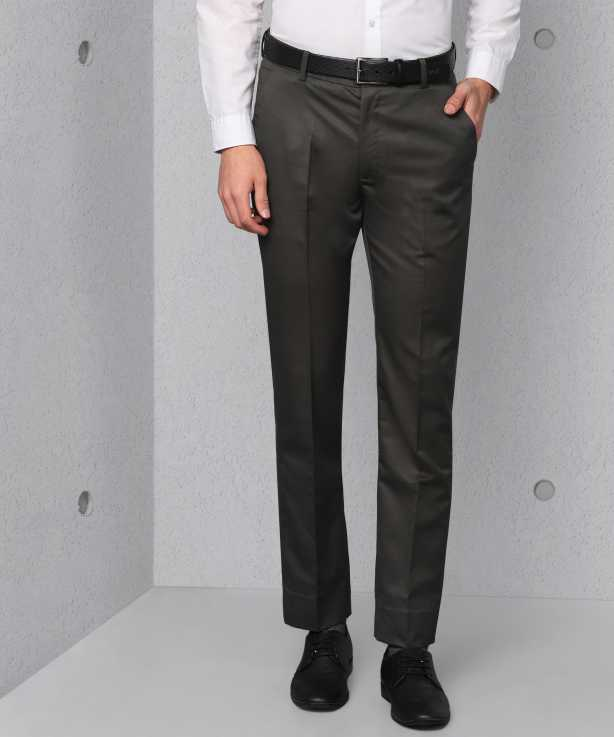

In [76]:
similar_product("regular fit men black trouser",tfidf_title_vectorizer,tfidf_title_features)

bert model

In [56]:
pip install sentence-transformers

     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 2.5MB 41.3MB/s 
     |████████████████████████████████| 1.2MB 47.5MB/s 
     |████████████████████████████████| 3.3MB 50.5MB/s 
     |████████████████████████████████| 901kB 49.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=61c0a73a3dc9e95e156653f175b94a74a2184b216a1609ae2fde1ce8870524ee
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built sentence-transformers


In [57]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/sbert.net_models_bert-base-nli-mean-tokens/0_BERT were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [60]:
from tqdm import tqdm
clean_sentences=df.filtered_text.to_list()
bert_embedded=[]
for sent in tqdm(clean_sentences):
  bert_embedded.append(model.encode([sent]))

100%|██████████| 4618/4618 [01:04<00:00, 71.16it/s]


In [62]:
bert_model=model

In [79]:
bert_embedded=np.array(bert_embedded).reshape(4618,768)

In [80]:
bert_embedded.shape

(4618, 768)

In [81]:
def bert_similar_product(item_name,model,brand_name=""):
  txt=item_name+" "+brand_name
  vector_form=model.encode([txt]).reshape(1,-1)
  pairwise_dist = pairwise_distances(bert_embedded,vector_form)
  indices = np.argsort(pairwise_dist.flatten())[0:5]
  selected_data=df[['img_url','title']].iloc[indices]
  img_url=selected_data["img_url"].values
  for url in img_url:

    image = url_to_image(url)
    cv2_imshow(image)


    cv2.waitKey(0)

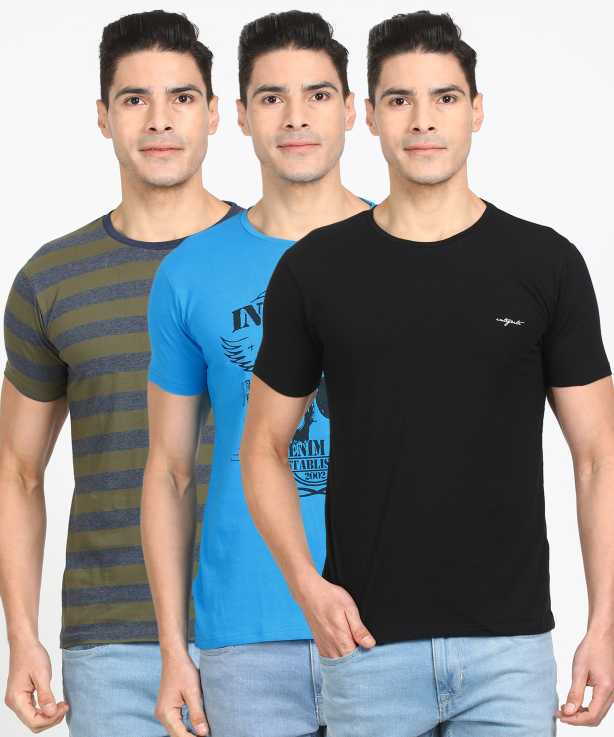

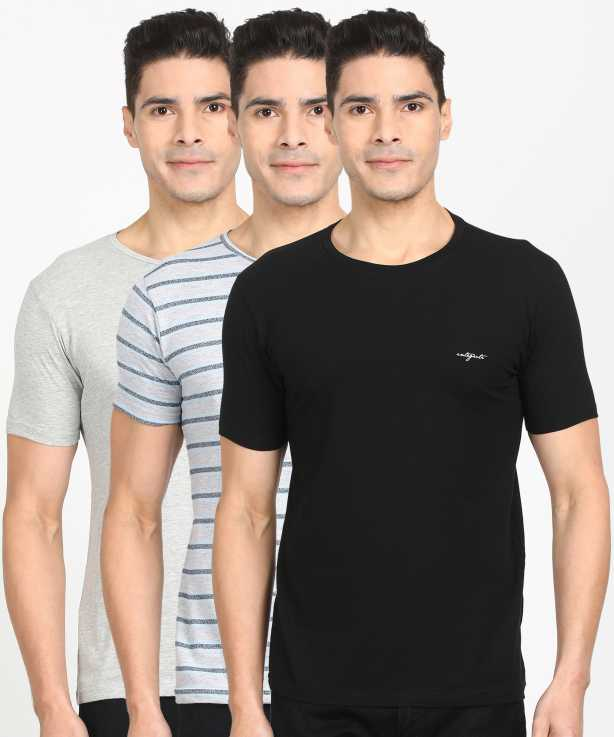

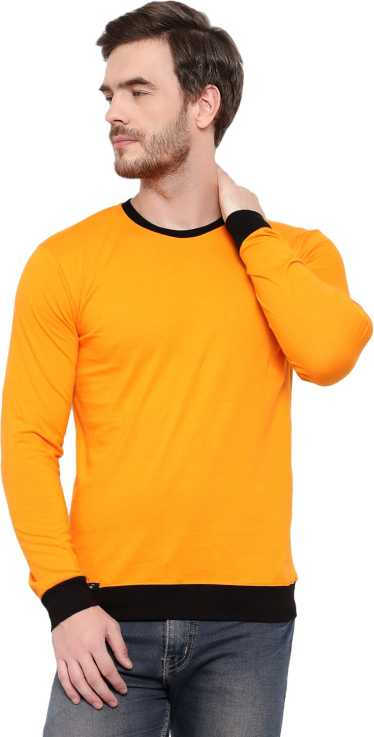

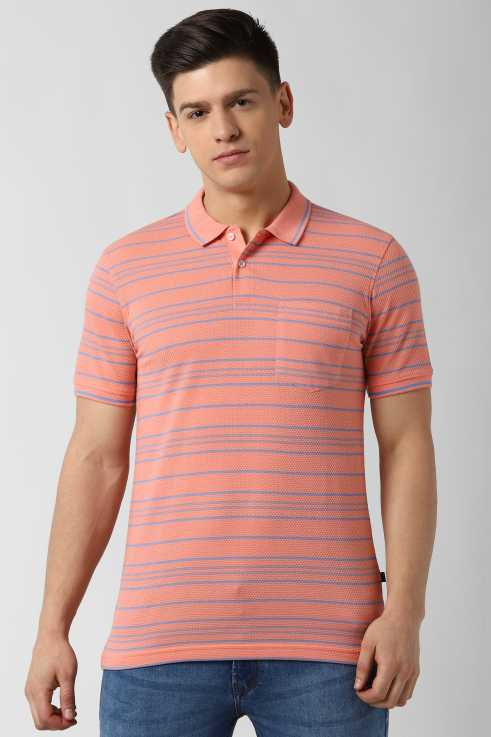

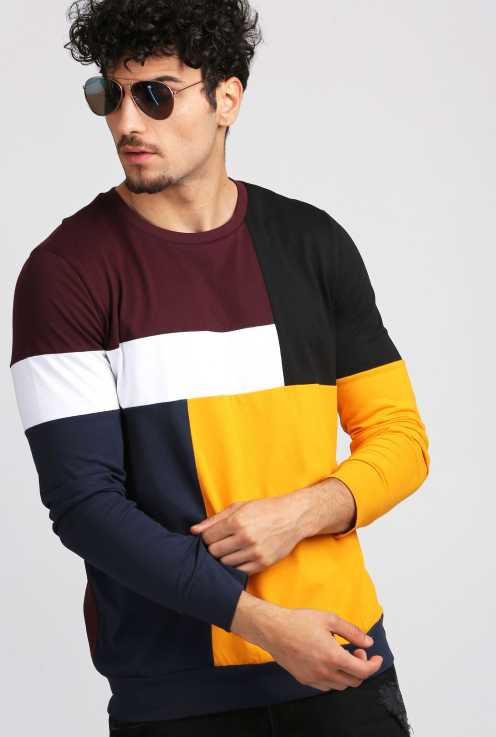

In [82]:
bert_similar_product("striped men round next t-shirt",bert_model)

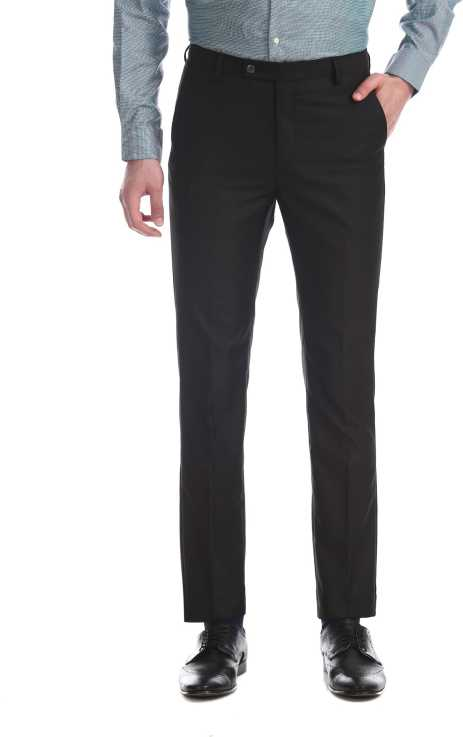

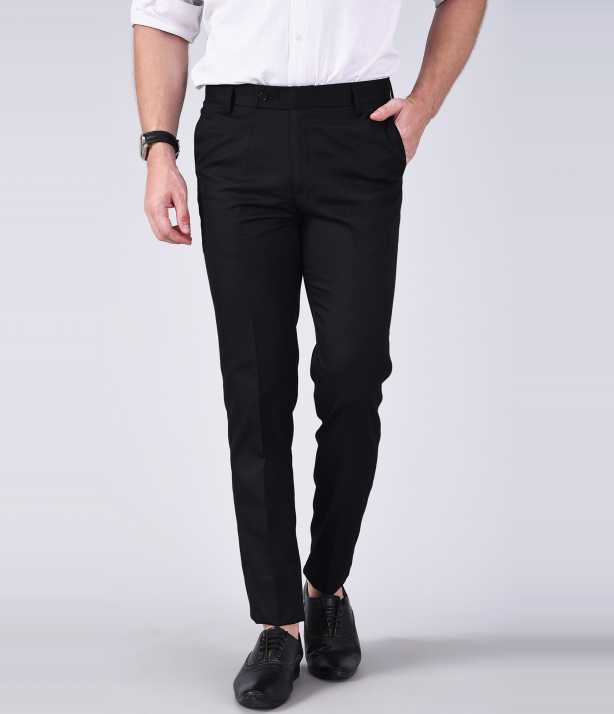

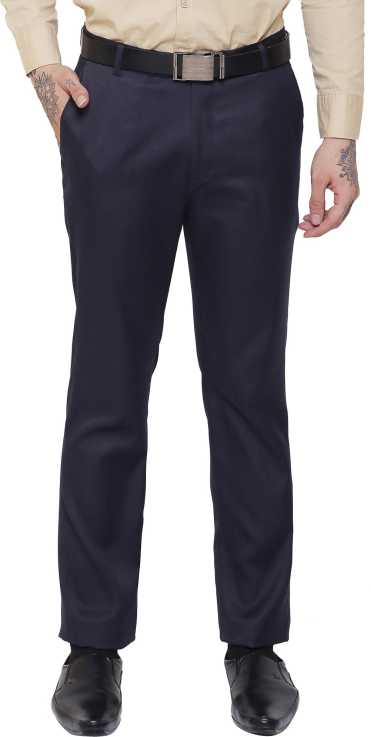

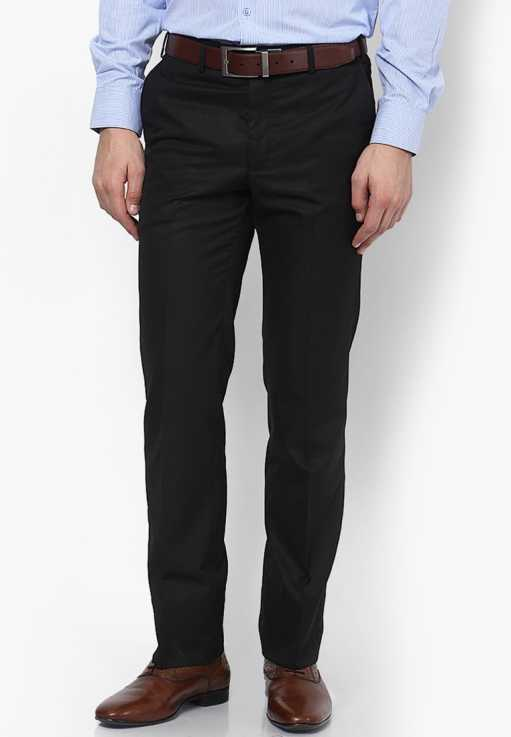

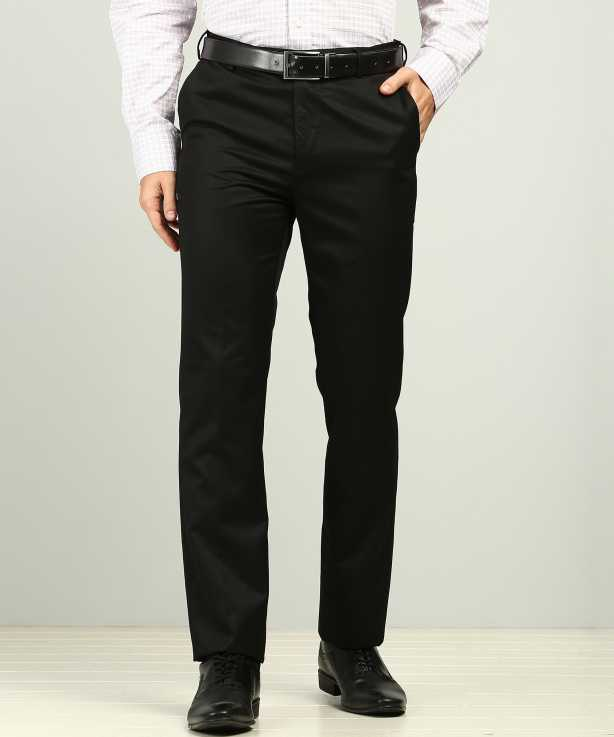

In [84]:
bert_similar_product("regular fit men black trouser",bert_model)

Bert is more reliable compare to other two model